# ロジスティック回帰

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 【問題1】～【問題5】

In [2]:
class ScratchLogisticRegression():
    """
    ロジスティック回帰のスクラッチ実装

    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue

    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      訓練データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証データに対する損失の記録

    """

    def __init__(self, num_iter, lr, bias, verbose, lam):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.bias = bias
        self.verbose = verbose
        self.lam = lam
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)

    # 【問題1】仮定関数
    def _sigmoid(self, y):
        return 1 / (1 + np.exp(-y))

    def _logistic_hypothesis(self, X):
        pred = X @ self.theta
        pred = self._sigmoid(pred)
        return pred
    
    # 【問題2】最急降下法
    def _gradient_descent(self, X, y):
        m = X.shape[0]
        n = X.shape[1]
        pred = self._logistic_hypothesis(X)
        for j in range(n):
            gradient = 0
            for i in range(m):
                gradient += (pred[i] - y[i]) * X[i, j]
            if self.bias and j == 0:
                self.theta[j] = self.theta[j] - self.lr * (gradient / m)
            else:
                self.theta[j] = self.theta[j] - self.lr * ((gradient + self.lam * self.theta[j]) / m)
    
    # 【問題4】目的関数
    def _loss_func(self, pred, y):
        error = 0
        for i in range(y.shape[0]):
            error += - np.sum(y[i] * np.log(pred[i]) + (1-y[i]) * np.log(1-pred[i]))
        loss = error / (y.shape[0])
        loss += np.sum(self.theta[self.bias:]**2) * self.lam / (2 * y.shape[0]) # 正則化項にバイアスは含めない
        return loss
    
    # 【問題5】学習と推定
    def fit(self, X, y, X_val, y_val):
        """
        ロジスティック回帰を学習する。検証データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        """
        
        # バイアス項を追加
        if self.bias:
            bias = np.ones((X.shape[0], 1))
            X = np.hstack((bias, X))
            bias = np.ones((X_val.shape[0], 1))
            X_val = np.hstack((bias, X_val))
        
        # パラメータを初期化
        self.theta = np.zeros(X.shape[1])
        
        for i in range(self.iter):
            # 学習・検証データの損失を計算して保存
            pred = self._logistic_hypothesis(X)
            pred_val = self._logistic_hypothesis(X_val)
            self.loss[i] = self._loss_func(pred, y)
            self.val_loss[i] = self._loss_func(pred_val, y_val)
            
            # パラメータを更新
            self._gradient_descent(X, y)
            
            if self.verbose:
                if (i+1) % 50 == 0 or i == 0:
                    print(f'[epoch {i+1:4}] loss: {self.loss[i]:<8.4} val_loss: {self.val_loss[i]:.4}')

    # 【問題3】推定
    def predict(self, X):
        """
        ロジスティック回帰を使いラベルを推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            ロジスティック回帰による推定結果
        """
        if self.bias:
            a = np.ones((X.shape[0], 1))
            X = np.hstack([a, X])
        return  np.where(self._logistic_hypothesis(X) >= 0.5, 1, 0)

    def predict_proba(self, X):
        """
        ロジスティック回帰を使い確率を推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            ロジスティック回帰による推定結果
        """
        if self.bias:
            a = np.ones((X.shape[0], 1))
            X = np.hstack([a, X])
        return self._logistic_hypothesis(X)


## 【問題5】学習と推定

In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
X = iris.data[:100,:]
y = iris.target[:100]
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=0.2, random_state=10)

In [4]:
# 学習
slr = ScratchLogisticRegression(num_iter=500, lr=0.01, bias=True, verbose=True, lam=0.1)
slr.fit(X_train, y_train, X_test, y_test)

[epoch    1] loss: 0.6931   val_loss: 0.6931
[epoch   50] loss: 0.5043   val_loss: 0.5244
[epoch  100] loss: 0.3887   val_loss: 0.4089
[epoch  150] loss: 0.3122   val_loss: 0.3323
[epoch  200] loss: 0.2591   val_loss: 0.279
[epoch  250] loss: 0.2208   val_loss: 0.2403
[epoch  300] loss: 0.192    val_loss: 0.2112
[epoch  350] loss: 0.1697   val_loss: 0.1887
[epoch  400] loss: 0.152    val_loss: 0.1708
[epoch  450] loss: 0.1377   val_loss: 0.1563
[epoch  500] loss: 0.1259   val_loss: 0.1443


In [5]:
from sklearn import metrics

def evaluate(y_true, y_pred, title):
    accuracy = metrics.accuracy_score(y_true, y_pred)
    precision = metrics.precision_score(y_true, y_pred)
    recall = metrics.recall_score(y_true, y_pred)
    f1 = metrics.f1_score(y_true, y_pred)
    confusion = metrics.confusion_matrix(y_true, y_pred)
    
    print(    
        f'--- {title} ---',
        f'accuracy:  {accuracy}',
        f'precision: {precision}',
        f'recall:    {recall}',
        f'f1:        {f1}',
        f'confusion matrix:\n{confusion}',
        sep='\n'
    )

# 予測
pred = slr.predict(X_test)
evaluate(y_test, pred, 'Logistic Regression')

--- Logistic Regression ---
accuracy:  1.0
precision: 1.0
recall:    1.0
f1:        1.0
confusion matrix:
[[11  0]
 [ 0  9]]


## 【問題6】学習曲線のプロット

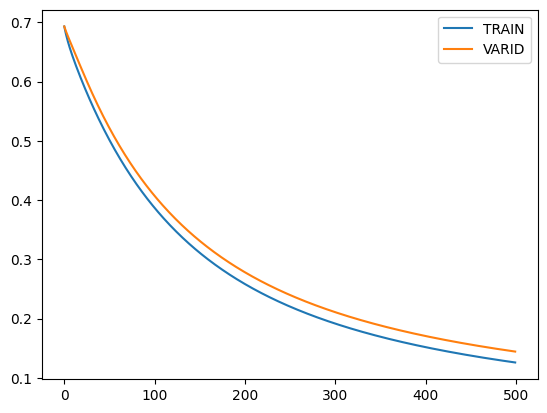

In [6]:
plt.plot(slr.loss, label='TRAIN')
plt.plot(slr.val_loss, label='VARID')
plt.legend()
plt.show()

## 【問題7】決定領域の可視化

[epoch    1] loss: 0.6931   val_loss: 0.6931
[epoch   50] loss: 0.6897   val_loss: 0.6896
[epoch  100] loss: 0.6863   val_loss: 0.6863
[epoch  150] loss: 0.6829   val_loss: 0.683
[epoch  200] loss: 0.6795   val_loss: 0.6799
[epoch  250] loss: 0.6761   val_loss: 0.6769
[epoch  300] loss: 0.6728   val_loss: 0.6738
[epoch  350] loss: 0.6695   val_loss: 0.6709
[epoch  400] loss: 0.6662   val_loss: 0.6679
[epoch  450] loss: 0.663    val_loss: 0.665
[epoch  500] loss: 0.6598   val_loss: 0.6622
[epoch  550] loss: 0.6566   val_loss: 0.6593
[epoch  600] loss: 0.6534   val_loss: 0.6565
[epoch  650] loss: 0.6503   val_loss: 0.6537
[epoch  700] loss: 0.6472   val_loss: 0.6509
[epoch  750] loss: 0.6441   val_loss: 0.6482
[epoch  800] loss: 0.6411   val_loss: 0.6454
[epoch  850] loss: 0.638    val_loss: 0.6427
[epoch  900] loss: 0.635    val_loss: 0.64
[epoch  950] loss: 0.632    val_loss: 0.6374
[epoch 1000] loss: 0.6291   val_loss: 0.6348
[epoch 1050] loss: 0.6262   val_loss: 0.6321
[epoch 1100] l

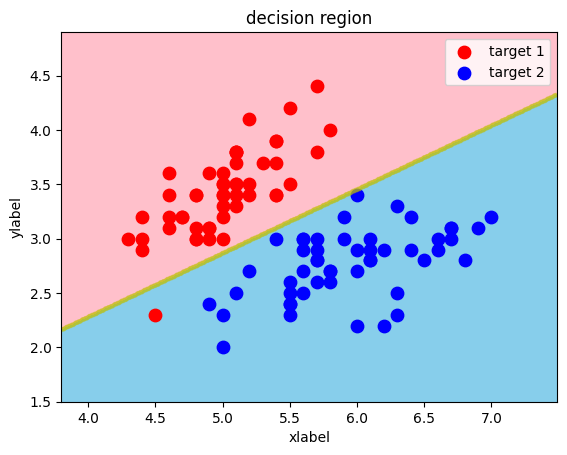

In [7]:
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['target 1', 'target 2']):
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2

    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)

    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(np.unique(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

X = iris.data[:100,:2]
y = iris.target[:100]
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=0.2)
slr = ScratchLogisticRegression(num_iter=2000, lr=0.001, bias=True, verbose=True, lam=0.1)
slr.fit(X_train, y_train,X_test,y_test)

decision_region(X, y, slr)

## 【問題8】（アドバンス課題）重みの保存

In [8]:
print(slr.theta)

# 保存
np.save('theta', slr.theta)

# 読み込み
print(np.load('theta.npy'))

[-0.03050946  0.24537416 -0.41815922]
[-0.03050946  0.24537416 -0.41815922]
